# Homework #3: Bracketing
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 6/24/2020|

## Initialization

In [49]:
using Plots
using Base.MathConstants

ϕ = golden

φ = 1.6180339887498...

## Algorithms

In [52]:
function fibonacci_search(f, a, b, n; ϵ=0.01)
    s = (1-√5)/(1+√5)
    ρ = 1 / (φ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    as, bs = Float64[a], Float64[b]
    
    for i in 1 : n-1
        if i == n-1
            c = ϵ*a + (1-ϵ)*d
        else
            c = ρ*a + (1-ρ)*b
        end
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c
        end
        ρ = 1 / (φ*(1-s^(n-i+1))/(1-s^(n-i)))
        append!(as, a)
        append!(bs, b)
    end
#     return a < b ? (a, b) : (b, a)
    return as, bs
end

fibonacci_search (generic function with 1 method)

In [192]:
function golden_section_search(f, a, b, n)
    ρ = φ-1
    d = ρ * b + (1 - ρ)*a
    yd = f(d)
    as, bs = Float64[a], Float64[b]
    
    for i = 1 : n-1
        c = ρ*a + (1 - ρ)*b
        yc = f(c)
        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c
        end
        append!(as, a)
        append!(bs, b)
    end
#     return a < b ? (a, b) : (b, a)
    return as, bs
end

golden_section_search (generic function with 1 method)

## Function

In [80]:
f(x) = cos(x)
a, b, n = 2.33, 2π, 5;

In [193]:
fas, fbs = fibonacci_search(f, a, b, n)
gsas, gsbs = golden_section_search(f, a, b, n)

([2.33, 2.33, 2.33, 3.839982423515908, 2.9067619633681385], [6.283185307179586, 4.773202883663678, 3.839982423515908, 2.9067619633681385, 3.483523926736277])

## Plots

### Fibonacci Search

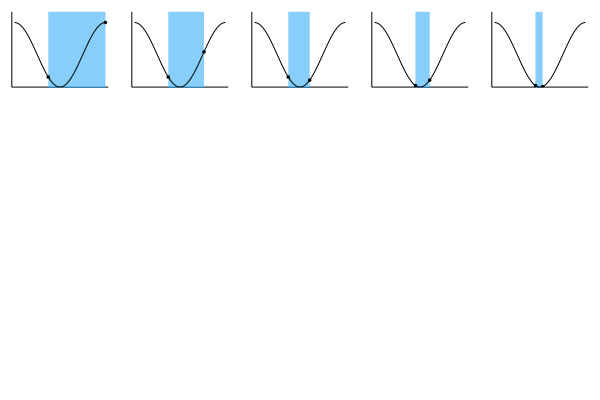

In [191]:
ps = Any[]
hts = fill(0.2, n)
g(x) = -1

# create series of plots for each iteration of bracketing algorithm
for i in 1:n
    if fas[i] < fbs[i]
        p = plot(g, fas[i], fbs[i], fill=(-1, 1.33, :lightskyblue))
    else
        p = plot(g, fbs[i], fas[i], fill=(-1, 1.33, :lightskyblue))
    end
    plot!(f, 0, 2π,
        color=:black,
        label="",
        legend=nothing,
        ylims=(-1, 1.33),
        ticks=nothing)
    scatter!([fas[i], fbs[i]], [f.([fas[i], fbs[i]])], marker=(2, :black))
    
    push!(ps, p)
end

plot(ps..., layout=grid(1, n, heights=hts))

### Golden Section Search

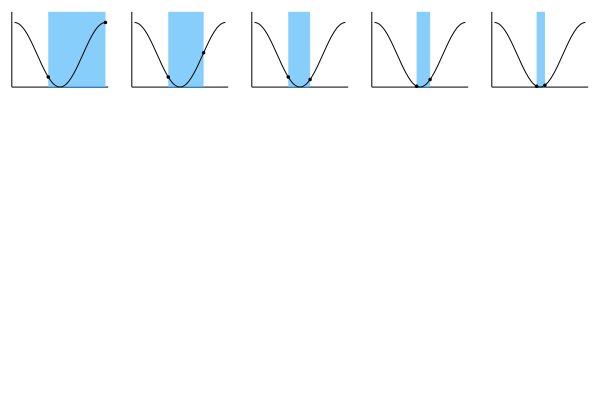

In [194]:
ps = Any[]
hts = fill(0.2, n)
g(x) = -1

# create series of plots for each iteration of bracketing algorithm
for i in 1:n
    if gsas[i] < gsbs[i]
        p = plot(g, gsas[i], gsbs[i], fill=(-1, 1.33, :lightskyblue))
    else
        p = plot(g, gsbs[i], gsas[i], fill=(-1, 1.33, :lightskyblue))
    end
    plot!(f, 0, 2π,
        color=:black,
        label="",
        legend=nothing,
        ylims=(-1, 1.33),
        ticks=nothing)
    scatter!([gsas[i], gsbs[i]], [f.([gsas[i], gsbs[i]])], marker=(2, :black))
    
    push!(ps, p)
end

plot(ps..., layout=grid(1, n, heights=hts))

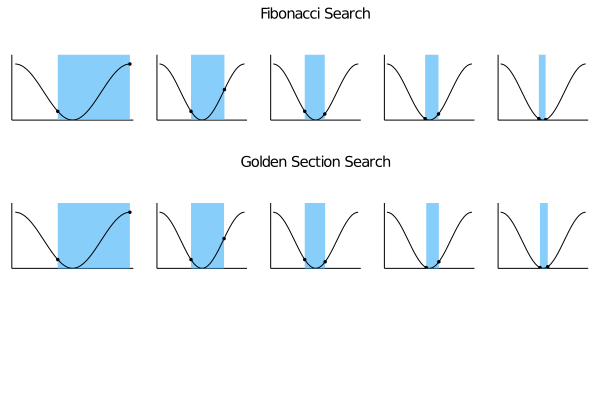

In [204]:
# hack to put global title for layout subplots

fps, gsps = Any[], Any[]
hts = fill(0.8, n)

# create series of plots for each iteration of bracketing algorithm
for i in 1:n
    if fas[i] < fbs[i]
        p = plot(g, fas[i], fbs[i], fill=(-1, 1.33, :lightskyblue))
    else
        p = plot(g, fbs[i], fas[i], fill=(-1, 1.33, :lightskyblue))
    end
    plot!(f, 0, 2π,
        color=:black,
        label="",
        legend=nothing,
        ylims=(-1, 1.33),
        ticks=nothing)
    scatter!([fas[i], fbs[i]], [f.([fas[i], fbs[i]])], marker=(2, :black))
    push!(fps, p)
    if gsas[i] < gsbs[i]
        p = plot(g, gsas[i], gsbs[i], fill=(-1, 1.33, :lightskyblue))
    else
        p = plot(g, gsbs[i], gsas[i], fill=(-1, 1.33, :lightskyblue))
    end
    plot!(f, 0, 2π,
        color=:black,
        label="",
        legend=nothing,
        ylims=(-1, 1.33),
        ticks=nothing)
    scatter!([gsas[i], gsbs[i]], [f.([gsas[i], gsbs[i]])], marker=(2, :black))
    push!(gsps, p)
end

# create a transparent scatter plot with an 'annotation' that will become title
y = ones(3)
title1 = scatter(y,
    marker=(:white, 0, 0),
    annotations=(2, 1.5,
    text("Fibonacci Search", 10)),
    grid=false,
    axis=false,
    leg=false)
title2 = scatter(y,
    marker=(:white, 0, 0),
    annotations=(2, 1.5,
    text("Golden Section Search", 10)),
    grid=false,
    axis=false,
    leg=false)

# combine the 'title' plot with your real plots
plot(
    title1,
    plot(fps..., layout=grid(1, n, heights=hts)),
    title2,
    plot(gsps..., layout=grid(1, n, heights=hts)),
    layout=grid(4,1,heights=[0.01, 0.3, 0.01, 0.3])
)